In [1]:
library(MASS)
library(corrplot)
library(boot)
library(leaps)
library(splines)
library(tree)

corrplot 0.92 loaded



In [9]:
roughContact <- read.csv('../../../data/RoughContact/newPulloffJan28th.csv', header = TRUE,  sep = ';')[, -1]

head(roughContact)

,L,lambdaR,lambdaS,surfaceEnergy,rho,pulloff
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,512,128,2,0.0173428,0.01586214,3.40e-07
2,512,128,2,0.0433570,0.02921830,1.82e-06
3,512,128,2,0.0693712,0.03997010,3.76e-06
4,512,128,2,0.0867140,0.05826470,8.74e-06
5,512,128,2,0.1300710,0.07634850,1.60e-05
6,512,128,2,0.1647566,0.08938030,2.34e-05


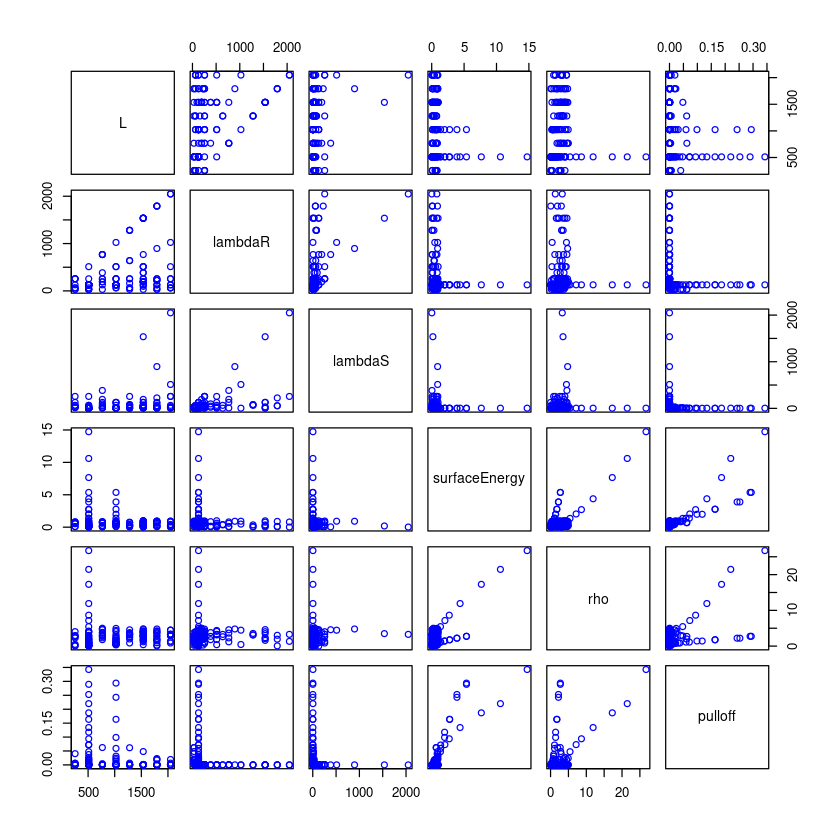

In [10]:
pairs(~ L + lambdaR + lambdaS + surfaceEnergy + rho + pulloff, data = roughContact, col = 'blue')

In [11]:
summary(roughContact)

       L           lambdaR        lambdaS        surfaceEnergy      
 Min.   : 256   Min.   :  32   Min.   :   2.00   Min.   : 0.005227  
 1st Qu.: 512   1st Qu.: 128   1st Qu.:   4.00   1st Qu.: 0.182328  
 Median :1024   Median : 128   Median :  16.00   Median : 0.475879  
 Mean   :1065   Mean   : 346   Mean   :  74.74   Mean   : 0.905672  
 3rd Qu.:1536   3rd Qu.: 256   3rd Qu.:  64.00   3rd Qu.: 0.822711  
 Max.   :2048   Max.   :2048   Max.   :2048.00   Max.   :14.730300  
      rho              pulloff         
 Min.   : 0.01472   Min.   :0.0000001  
 1st Qu.: 0.96408   1st Qu.:0.0000355  
 Median : 2.52081   Median :0.0002219  
 Mean   : 2.83590   Mean   :0.0238697  
 3rd Qu.: 3.64306   3rd Qu.:0.0095343  
 Max.   :26.71893   Max.   :0.3426180  

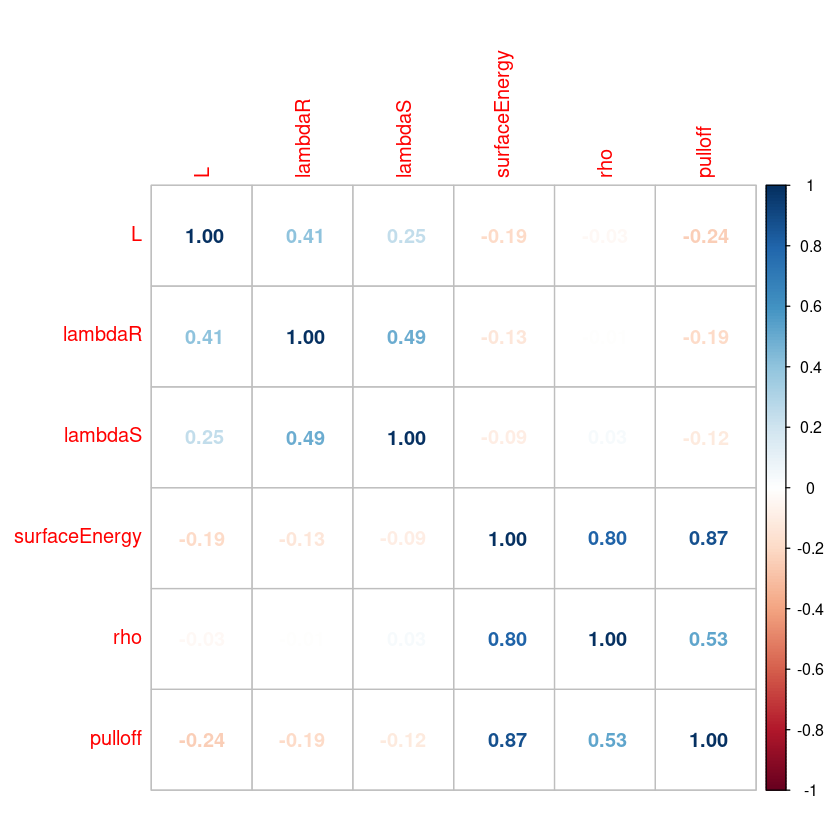

In [19]:
roughContact.cor <- cor(roughContact)

corrplot(roughContact.cor, method='number')

In [13]:
set.seed(1)

sample <- sample(c(TRUE, FALSE), nrow(roughContact), replace = TRUE, prob = c(0.8, 0.2))
train <- roughContact[sample, ]
test <- roughContact[!sample, ]

In [20]:
lmFit <- lm(pulloff ~ rho + surfaceEnergy, data = train)
summary(lmFit)


Call:
lm(formula = pulloff ~ rho + surfaceEnergy, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058369 -0.016400 -0.003216  0.013804  0.094177 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.011583   0.003075   3.767 0.000258 ***
rho           -0.009094   0.001162  -7.828 2.28e-12 ***
surfaceEnergy  0.042931   0.002177  19.724  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02492 on 119 degrees of freedom
Multiple R-squared:  0.8407,	Adjusted R-squared:  0.838 
F-statistic: 314.1 on 2 and 119 DF,  p-value: < 2.2e-16


In [21]:
pred <- predict(lmFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.02464283

In [24]:
lmFit2 <- lm(pulloff ~ surfaceEnergy * rho, data = train)
summary(lmFit2)


Call:
lm(formula = pulloff ~ surfaceEnergy * rho, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049734 -0.013444  0.003477  0.011958  0.054677 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.008890   0.003195  -2.783 0.006278 ** 
surfaceEnergy      0.057739   0.002285  25.274  < 2e-16 ***
rho               -0.003691   0.001053  -3.504 0.000648 ***
surfaceEnergy:rho -0.001118   0.000119  -9.393 5.49e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01893 on 118 degrees of freedom
Multiple R-squared:  0.9089,	Adjusted R-squared:  0.9065 
F-statistic: 392.3 on 3 and 118 DF,  p-value: < 2.2e-16


In [25]:
pred <- predict(lmFit2, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.01485021

In [26]:
regFit <- regsubsets(pulloff ~ ., train)
summary(regFit)

Subset selection object
Call: regsubsets.formula(pulloff ~ ., train)
5 Variables  (and intercept)
              Forced in Forced out
L                 FALSE      FALSE
lambdaR           FALSE      FALSE
lambdaS           FALSE      FALSE
surfaceEnergy     FALSE      FALSE
rho               FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         L   lambdaR lambdaS surfaceEnergy rho
1  ( 1 ) " " " "     " "     "*"           " "
2  ( 1 ) " " " "     " "     "*"           "*"
3  ( 1 ) " " "*"     " "     "*"           "*"
4  ( 1 ) " " "*"     "*"     "*"           "*"
5  ( 1 ) "*" "*"     "*"     "*"           "*"

In [35]:
splineFit <- lm(pulloff ~ bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25), data = train)
summary(splineFit)


Call:
lm(formula = pulloff ~ bs(L + lambdaR * lambdaS + rho * surfaceEnergy, 
    df = 25), data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113144 -0.000570 -0.000036  0.000415  0.209120 

Coefficients:
                                                             Estimate
(Intercept)                                                 0.0005711
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)1  -0.0043771
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)2   0.0193185
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)3   1.1326101
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)4  -0.1601387
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)5  -0.2926360
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)6   0.4819698
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)7  -0.1261597
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)8   0.2395707
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 25)9  -0.06

In [36]:
pred <- predict(splineFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.02518712